In [8]:
import numpy as np
import scipy.stats as scst
from scipy.stats import uniform, bernoulli
import matplotlib.pyplot as plt
import math

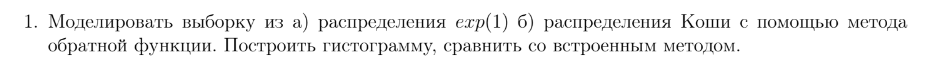

# 1a)

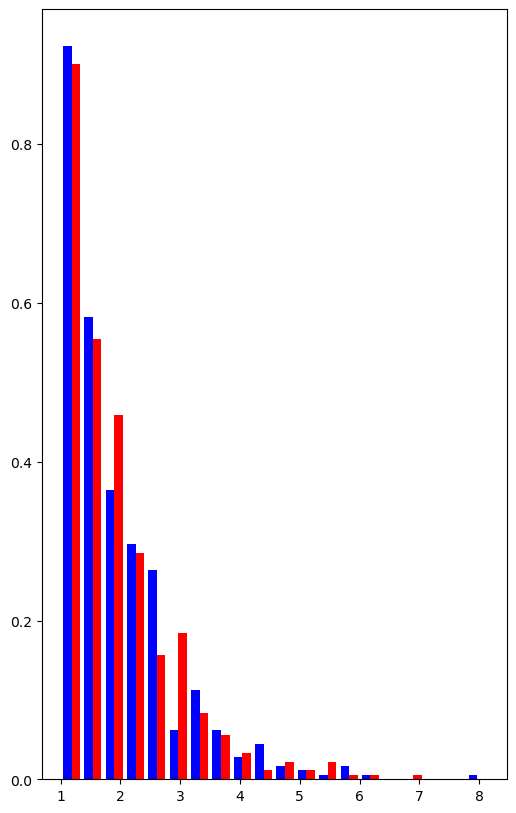

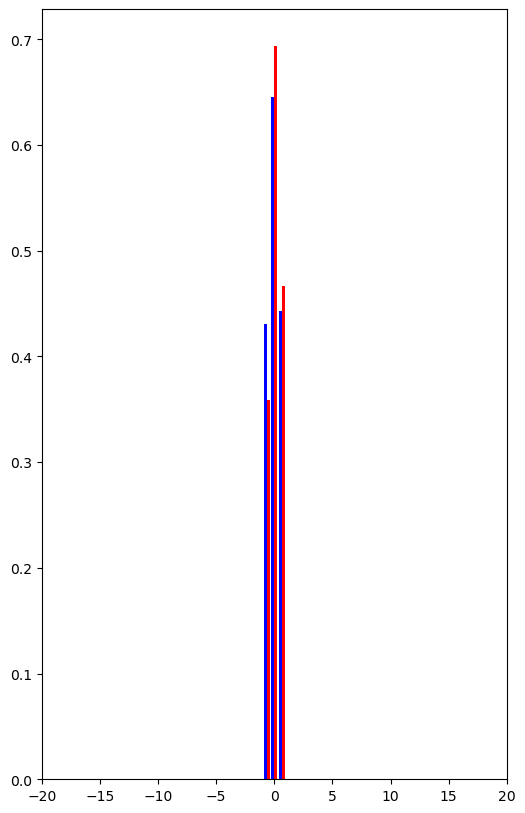

In [1]:


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform, expon, cauchy

k = 500

R1 = uniform(0,1).rvs(size=k)
exp = expon.ppf(R1,1)
X_for_plot = expon(1).rvs(size=k)
plt.figure(figsize=(6,10))
plt.hist([exp, X_for_plot], bins = 20, color = ['b', 'r'], density=True, label=True)
plt.show()

#b)

R2 = uniform(0,1).rvs(size=k)
cauch = cauchy.ppf(R2)
X_for_plot = cauchy.rvs(size=k)
plt.figure(figsize=(6,10))
cauch_new = []
for i in cauch:
    if (i < 1) & (i > -1):
        cauch_new.append(i)

X_new = []
for i in X_for_plot:
    if (i < 1) & (i > -1):
        X_new.append(i)

plt.hist([cauch_new, X_new], bins = 3, color = ['b', 'r'], density=True, label=True)
plt.xlim(-20, 20)
plt.show()

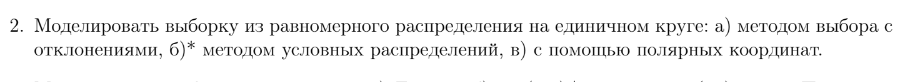

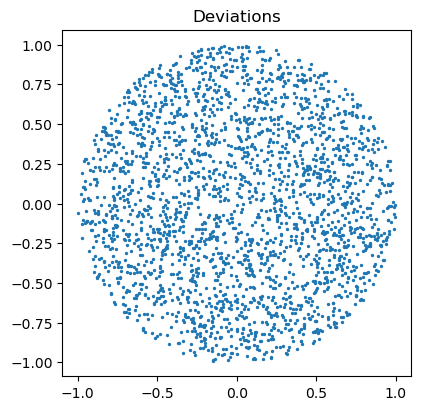

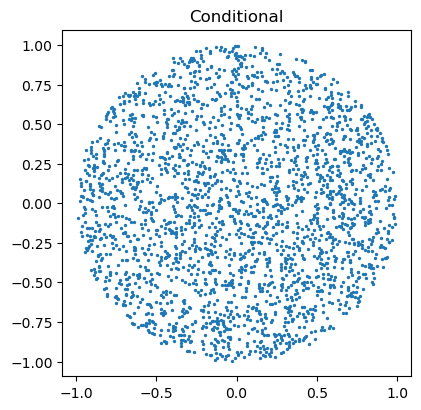

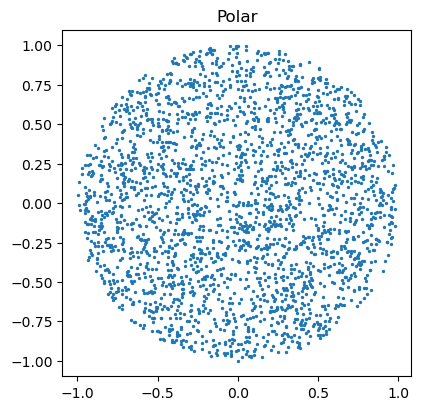

In [5]:
import numpy as np
import scipy.stats as scst
from scipy.stats import uniform, bernoulli
import matplotlib.pyplot as plt
import math

def UniCircleDeviations(sample_size:int):
    x_res = []
    y_res = []
    size = 0
    while (size<sample_size): #here the constant C is 1/pi
        x_axe = np.random.uniform(-1,1, size=1)
        y_axe = np.random.uniform(-1,1, size=1)
        p = (x_axe)**2 + (y_axe)**2
        if p <= 1:
            x_res = np.append(x_res, x_axe)
            y_res = np.append(y_res, y_axe)
            size+=1
        else:
            continue
    result_array = np.array([x_res, y_res])
    return result_array
a = UniCircleDeviations(2500)
plt.figure(figsize=(4.5,4.5))
plt.title("Deviations")
plt.scatter(a[0], a[1], s=2)
################################################################### ИСПРАВЛЕНО
def UniCircleConditional(sample_size:int):
    x_res = scst.semicircular.rvs(size = sample_size)
    y_res = []
    for i in range (sample_size):
        border = np.sqrt(1-(x_res[i])**2)
        rv = np.random.uniform(-border, border, size = 1)
        y_res = np.append(y_res, rv)
    result_array = np.array([x_res, y_res])
    return result_array
a = UniCircleConditional(2500)
plt.figure(figsize=(4.5,4.5))
plt.title("Conditional")
plt.scatter(a[0], a[1], s = 2)
##################################################################
def UniCirclePolar(sample_size:int):
    r_res = np.random.uniform(0,1, size = sample_size)
    phi_res = np.random.uniform(0, 2*np.pi, size = sample_size)
    result_array = np.array([r_res, phi_res])
    return result_array
a = UniCirclePolar(2500)
plt.figure(figsize=(4.5,4.5))
plt.title("Polar")
plt.scatter(np.sqrt(a[0])*np.cos(a[1]), np.sqrt(a[0])*np.sin(a[1]), s=2)

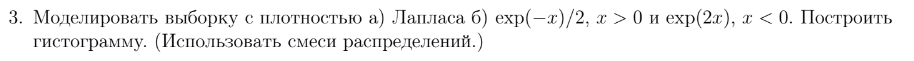

# 3a)

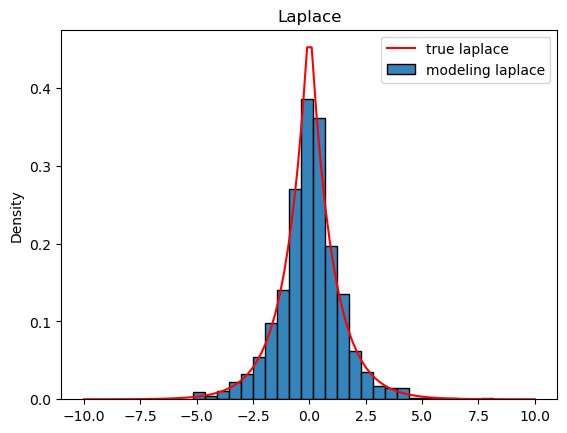

In [16]:

import seaborn as sns

x = np.linspace(-10,10,100)
def apply_inv_laplace(q: float):
    return scst.laplace.ppf(q, scale = 1)
def generate_laplace(sample_size):
    UniformSample = np.random.uniform(0,1, size=sample_size)
    ResLaplace = np.array([apply_inv_laplace(q) for q in UniformSample])
    return ResLaplace

fig1,ax1 = plt.subplots()
plt.title('Laplace')
ax1 = sns.histplot(generate_laplace(1000), bins = 25, kde = False, stat='density', alpha = 0.9, label = 'modeling laplace')
ax1.plot(x, scst.laplace.pdf(x), color = 'red', label = 'true laplace')

plt.legend()
plt.show()

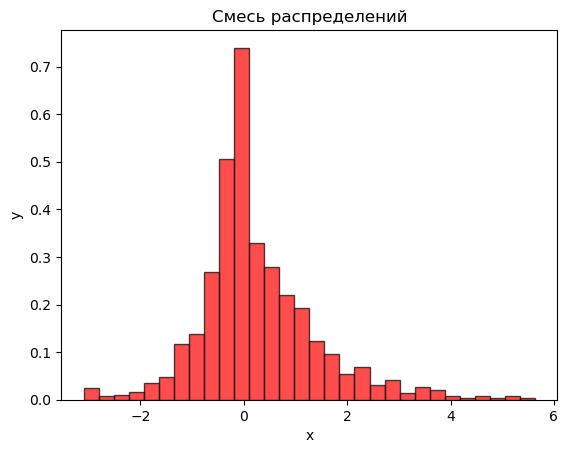

In [108]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

prob_component1 = 1/2
prob_component2 = 1/2

samples = np.zeros(n)

for i in range(n):
    component = np.random.choice([1, 2], p=[prob_component1, prob_component2])   
    if component == 1:
        samples[i] = -np.log(1 - np.random.uniform(0,1))
    else:
        samples[i] = np.log(np.random.uniform(0,1)) / 2  

plt.hist(samples, bins=30, density=1, alpha=0.7, color='red', edgecolor = 'black')

plt.title('Смесь распределений')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


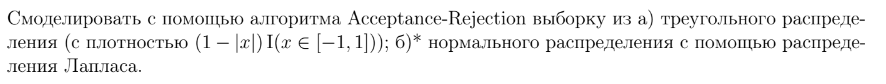

# 5a)

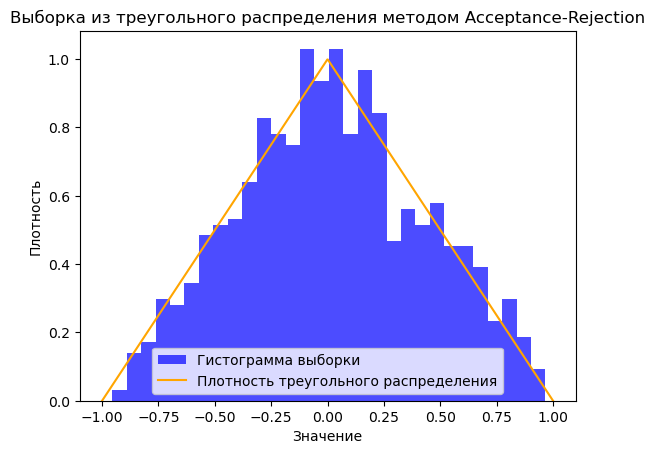

In [24]:

import numpy as np
import matplotlib.pyplot as plt

# Плотность треугольного распределения
def triangular_density(x):
    return (1 - np.abs(x)) * (x >= -1) * (x <= 1)

def generate_triangular_sample(size):
    samples = []
    M = 1 

    while len(samples) < size:
        x_candidate = np.random.uniform(-1, 1)
        u = np.random.uniform(0, M * 1)  # Генерация u из [0, M * g(x)]

        # Принятие или отклонение
        if u <= triangular_density(x_candidate):
            samples.append(x_candidate)

    return np.array(samples)

sample_size = 1000
data = generate_triangular_sample(sample_size)

plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', label='Гистограмма выборки')

x_values = np.linspace(-1, 1, 1000)
plt.plot(x_values, triangular_density(x_values), label='Плотность треугольного распределения', color='orange')

plt.legend()
plt.title('Выборка из треугольного распределения методом Acceptance-Rejection')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.show()


# 5-b)

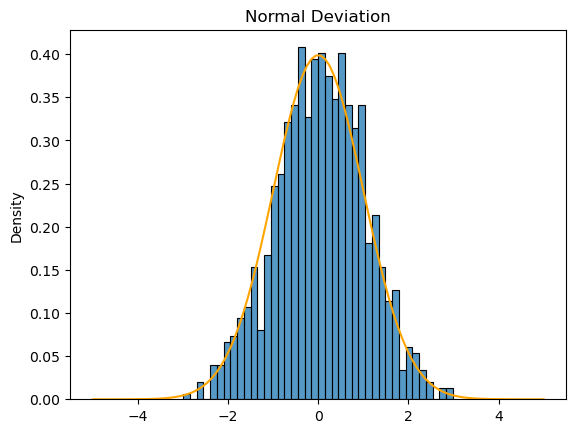

In [20]:
#5b

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scst

def NormalDeviations(sample_size:int):
    y_res = []
    Const = np.sqrt(2*np.e/np.pi)
    size = 0
    while (size<sample_size):
        y_axe = scst.laplace.rvs(size=1)
        p = scst.norm.pdf(y_axe)/(Const*scst.laplace.pdf(y_axe))
        flag = np.random.binomial(1,p=p,size=1)
        if flag == 1:
            y_res = np.append(y_res, y_axe)
            size+=1
        else:
            continue
    result_array = np.array(y_res)
    return result_array
normalno = NormalDeviations(1000)
x = np.linspace(-5,5,100)
plt.figure()
plt.title("Normal Deviation")
sns.histplot(normalno, bins = 40, stat = 'density')
plt.plot(x, scst.norm.pdf(x, loc = 0, scale = 1), color = 'orange')


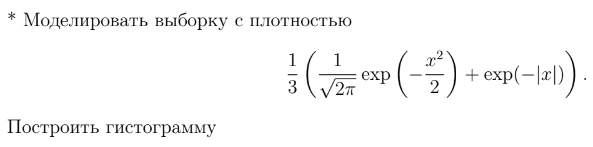

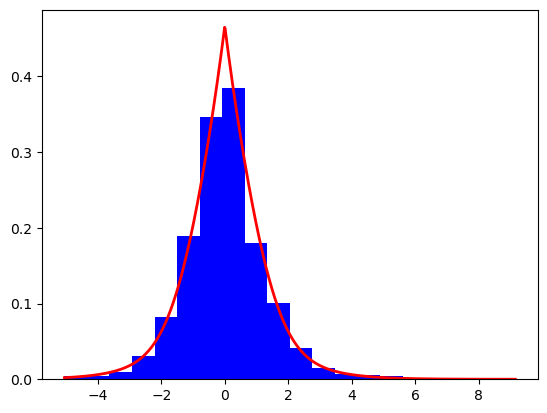

In [129]:
#4

import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as sci

size_n = 1000

def grafic(x):
    return (1/3) * ((1/np.sqrt(2*np.pi)) * np.exp(-((x**2)/2)) + np.exp(-(np.abs(x))))

def dat(size):
    mass = []
    kuda = [sci.bernoulli.rvs(1/3) for i in range(size)]
    
    for i in range(size):
        if kuda[i] == 1:
            mass.append(sci.norm.rvs(0,1))
        else:
            mass.append(sci.laplace.rvs(0,1))
    return mass

data = []
data = dat(size_n)
plt.hist(data, bins = 20, color='b', label='гистограмма', density=1)

x = np.linspace(min(data), max(data), 1000)
plt.plot(x, grafic(x), color='r', alpha = 1, linewidth = 2)